In [2]:
import sqil_core as sqil
import numpy as np
import matplotlib.pyplot as plt

from laboneq.dsl.quantum import QPU
from laboneq_applications.qpu_types.tunable_transmon import (
    TunableTransmonOperations,
    TunableTransmonQubit,
)
from helpers.sqil_transmon.qubit import SqilTransmon
from helpers.sqil_transmon.operations import SqilTransmonOperations

from laboneq_applications.experiments.options import (
    ResonatorSpectroscopyExperimentOptions,
)
from laboneq_applications.core import validation
from laboneq.dsl.enums import AcquisitionType
from laboneq.simple import Experiment, SweepParameter, dsl

from laboneq.dsl.quantum.quantum_element import QuantumElement
from numpy.typing import ArrayLike

%matplotlib inline

In [3]:
params = {
    "readout_lo_frequency": 7.2e9,
    "drive_lo_frequency": 5e9,
    "ext_lo": 11e9
}

### Resonator spectroscopy

2025-08-04 03:08:58,989 - INFO - Successfully connected to zi


[2025.08.04 03:08:58.989] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.08.04 03:08:58.989] INFO    VERSION: laboneq 2.57.0
[2025.08.04 03:08:58.998] INFO    Connecting to data server at localhost:8004
[2025.08.04 03:08:59.006] INFO    Connected to Zurich Instruments LabOne Data Server version 25.07.0.507 at localhost:8004
[2025.08.04 03:08:59.014] INFO    Configuring the device setup
[2025.08.04 03:08:59.022] INFO    The device setup is configured


2025-08-04 03:08:59,034 - INFO - Setting up instruments
2025-08-04 03:08:59,034 - INFO - Before exp


[2025.08.04 03:08:59.042] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.08.04 03:08:59.052] INFO    Starting LabOne Q Compiler run...
[2025.08.04 03:08:59.075] INFO    Schedule completed. [0.025 s]
[2025.08.04 03:08:59.092] INFO    Code generation completed for all AWGs. [0.021 s]
[2025.08.04 03:08:59.092] INFO    Completed compilation step 1 of 1. [0.048 s]
[2025.08.04 03:08:59.106] INFO     ──────────────────────────────────────────────────────────────── 
[2025.08.04 03:08:59.107] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.08.04 03:08:59.107] INFO     ──────────────────────────────────────────────────────────────── 
[2025.08.04 03:08:59.108] INFO      shfqc_0        0         21            0           1      8000  
[2025.08.04 03:08:59.108] INFO      shfqc_0_sg     0          9            1           0         0  
[2025.08.04 03:08:59.108] INFO     ─────────────────────────────────────────

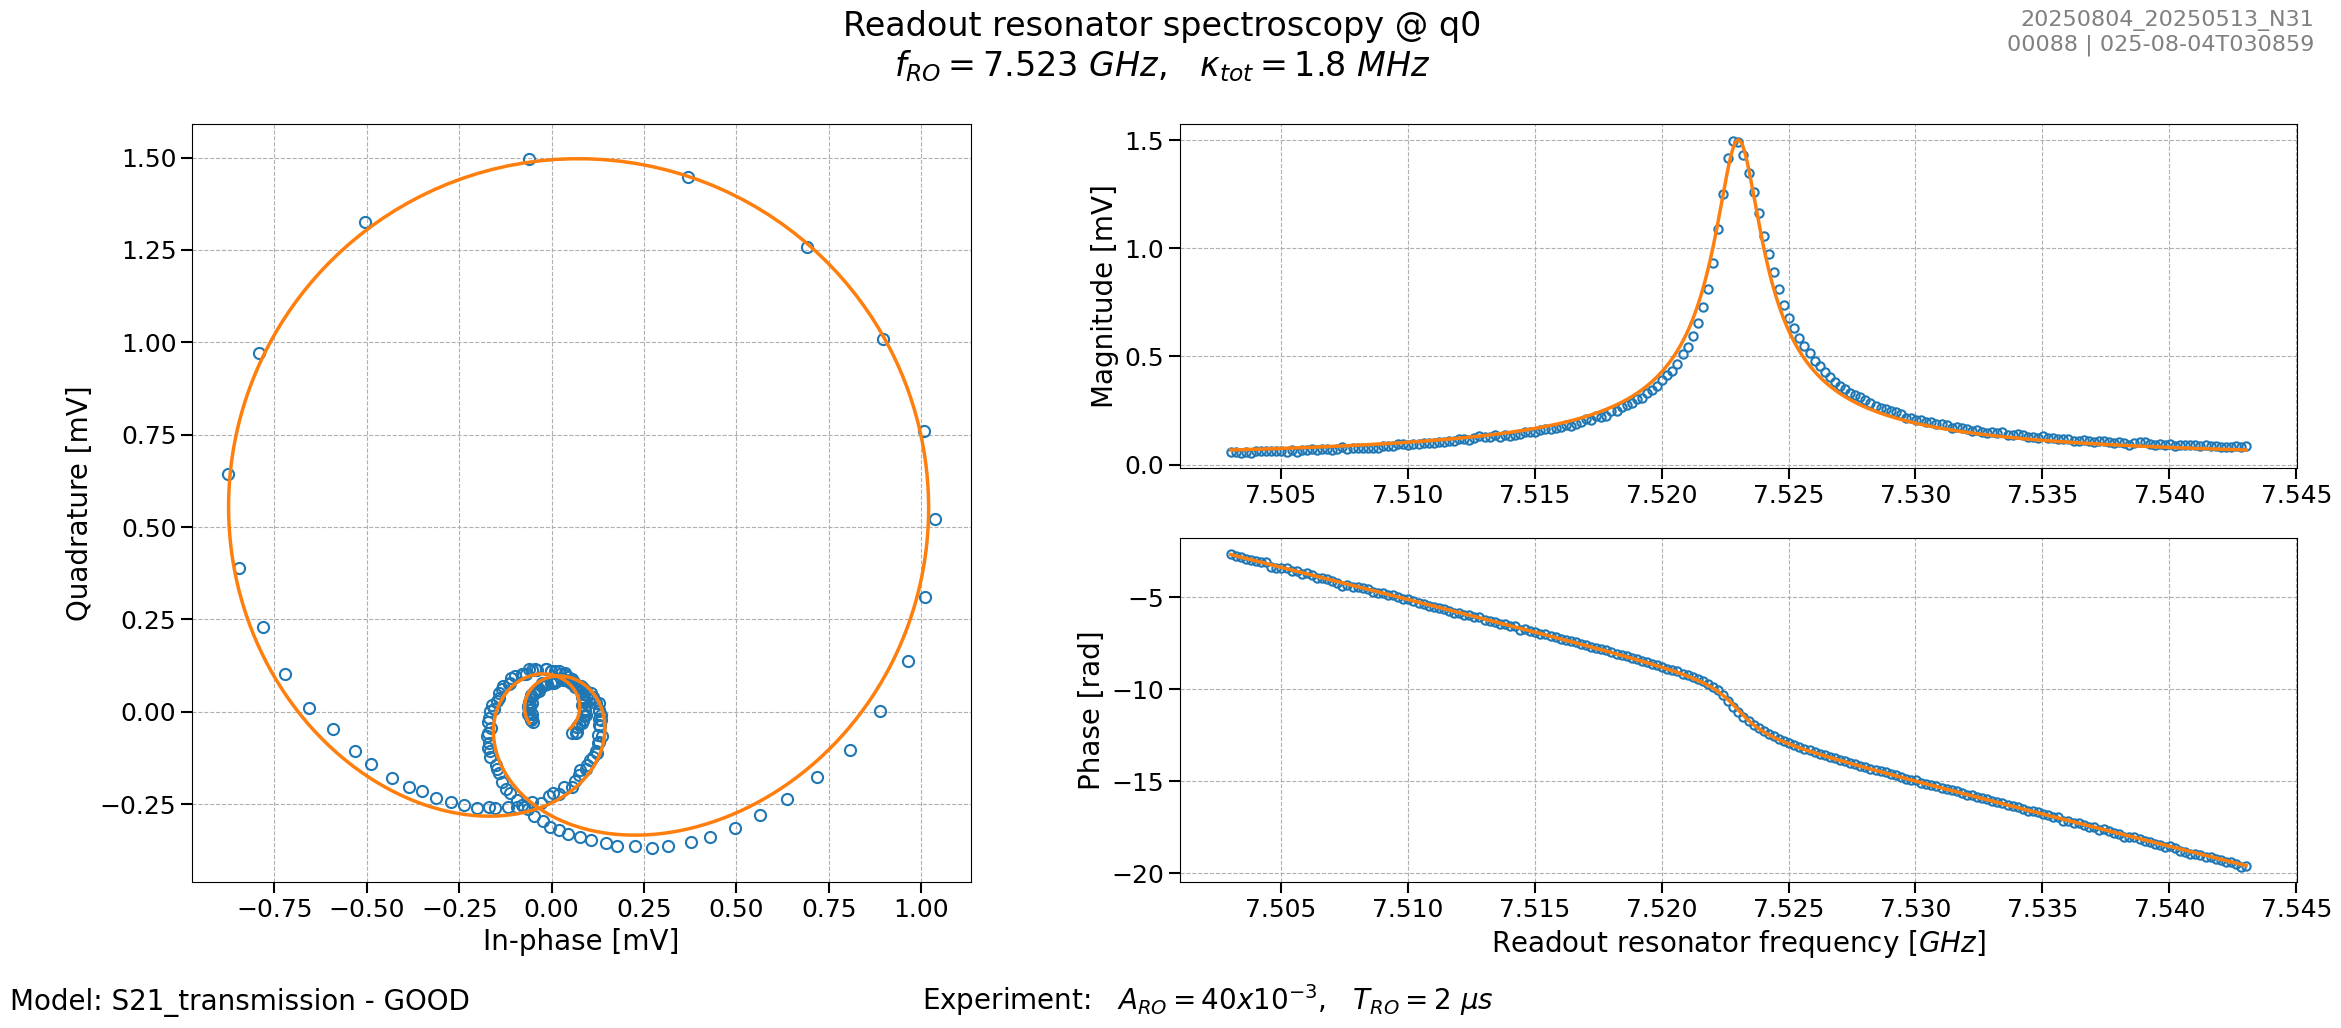

In [1]:
import numpy as np
from rr_spec import RRSpec, ResonatorSpectroscopyExperimentOptions

rr_spec = RRSpec()
options = ResonatorSpectroscopyExperimentOptions()
options.count = 800

result = rr_spec.run(
    # [np.linspace(7e9, 8e9, 2001)],
    [rr_spec.sweep_around("readout_resonator_frequency", 20e6, n_points=201)],
    # sweeps={"readout_amplitude": np.linspace(0.003, 0.06, 21)},
    # sweeps={"index": np.arange(200)},
    qu_ids=["q0"],
    options=options,
    update_params=True,
)

### Qubit specroscopy

2025-08-04 03:09:12,408 - INFO - Successfully connected to zi


[2025.08.04 03:09:12.415] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.08.04 03:09:12.417] INFO    VERSION: laboneq 2.57.0
[2025.08.04 03:09:12.418] INFO    Connecting to data server at localhost:8004
[2025.08.04 03:09:12.420] INFO    Connected to Zurich Instruments LabOne Data Server version 25.07.0.507 at localhost:8004
[2025.08.04 03:09:12.422] INFO    Configuring the device setup
[2025.08.04 03:09:12.435] INFO    The device setup is configured


2025-08-04 03:09:12,446 - INFO - Setting up instruments
2025-08-04 03:09:12,446 - INFO - Before exp


[2025.08.04 03:09:12.455] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/acquire' to HARDWARE
[2025.08.04 03:09:12.455] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.08.04 03:09:12.455] INFO    Starting LabOne Q Compiler run...
[2025.08.04 03:09:12.505] INFO    Schedule completed. [0.047 s]
[2025.08.04 03:09:12.553] INFO    Code generation completed for all AWGs. [0.043 s]
[2025.08.04 03:09:12.554] INFO    Completed compilation step 1 of 1. [0.092 s]
[2025.08.04 03:09:12.557] INFO     ──────────────────────────────────────────────────────────────── 
[2025.08.04 03:09:12.557] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.08.04 03:09:12.558] INFO     ──────────────────────────────────────────────────────────────── 
[2025.08.04 03:09:12.559] INFO      shfqc_0        0         11            0           1      8000  
[2025.08.04 03:09:12.559] INFO      shfqc_0_

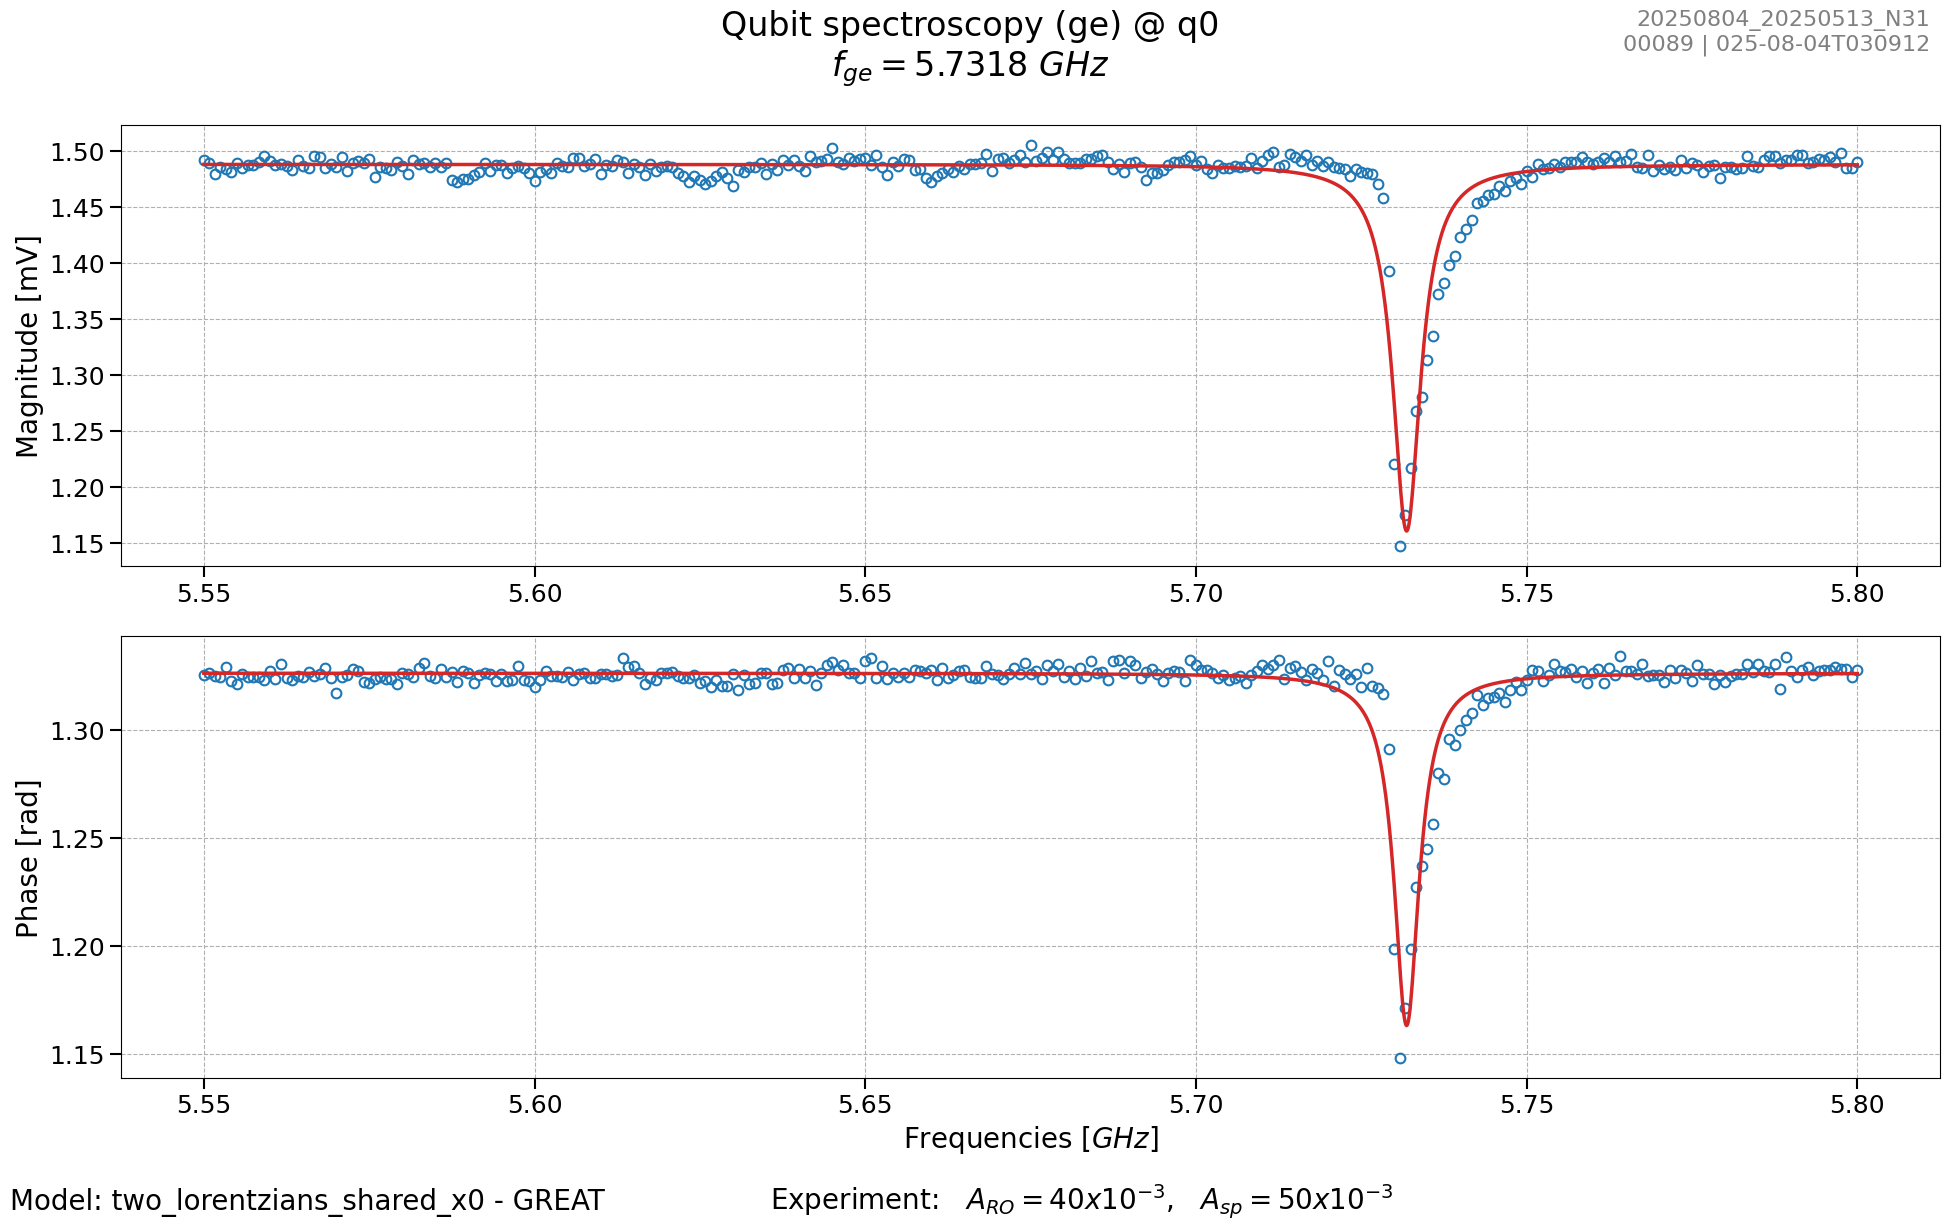

In [2]:
import numpy as np
from qu_spec import QuSpec, QuSpecOptions
from laboneq.dsl.enums import AveragingMode

qu_spec = QuSpec()
options = QuSpecOptions()
options.count = 800
options.averaging_mode = AveragingMode.CYCLIC

result = qu_spec.run(
    [np.linspace(5.55e9, 5.8e9, 301)],
    # [qu_spec.sweep_around("resonance_frequency_ge", 10e6, n_points=101)],
    # sweeps={"spectroscopy_amplitude": np.linspace(0.8,1,5)},
    # sweeps={"index": np.arange(3)},
    # sweeps={"spectroscopy_amplitude": np.linspace(0.003, 1, 70)},
    transition="ge",
    qu_ids=["q0"],
    options=options,
    update_params=False,
    relevant_params=["readout_amplitude", "spectroscopy_amplitude"],
)

### Time Rabi

2025-08-04 03:09:24,005 - INFO - Successfully connected to zi


[2025.08.04 03:09:24.013] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.08.04 03:09:24.014] INFO    VERSION: laboneq 2.57.0
[2025.08.04 03:09:24.016] INFO    Connecting to data server at localhost:8004
[2025.08.04 03:09:24.019] INFO    Connected to Zurich Instruments LabOne Data Server version 25.07.0.507 at localhost:8004
[2025.08.04 03:09:24.027] INFO    Configuring the device setup
[2025.08.04 03:09:24.031] INFO    The device setup is configured


2025-08-04 03:09:24,044 - INFO - Setting up instruments
2025-08-04 03:09:24,044 - INFO - Before exp


[2025.08.04 03:09:24.054] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/acquire' to HARDWARE
[2025.08.04 03:09:24.054] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.08.04 03:09:24.054] INFO    Starting LabOne Q Compiler run...
[2025.08.04 03:09:24.067] INFO    Schedule completed. [0.009 s]
[2025.08.04 03:09:24.078] INFO    Requested to compress pulse(s) rx_pulse_0 which has(have) either no, or too short, constant sections. Skipping compression
[2025.08.04 03:09:24.082] INFO    Requested to compress pulse(s) rx_pulse_0 which has(have) either no, or too short, constant sections. Skipping compression
[2025.08.04 03:09:24.082] INFO    Requested to compress pulse(s) rx_pulse_0 which has(have) either no, or too short, constant sections. Skipping compression
[2025.08.04 03:09:24.090] INFO    Requested to compress pulse(s) rx_pulse_0 which has(have) either no, or too short, constant sections. Skip

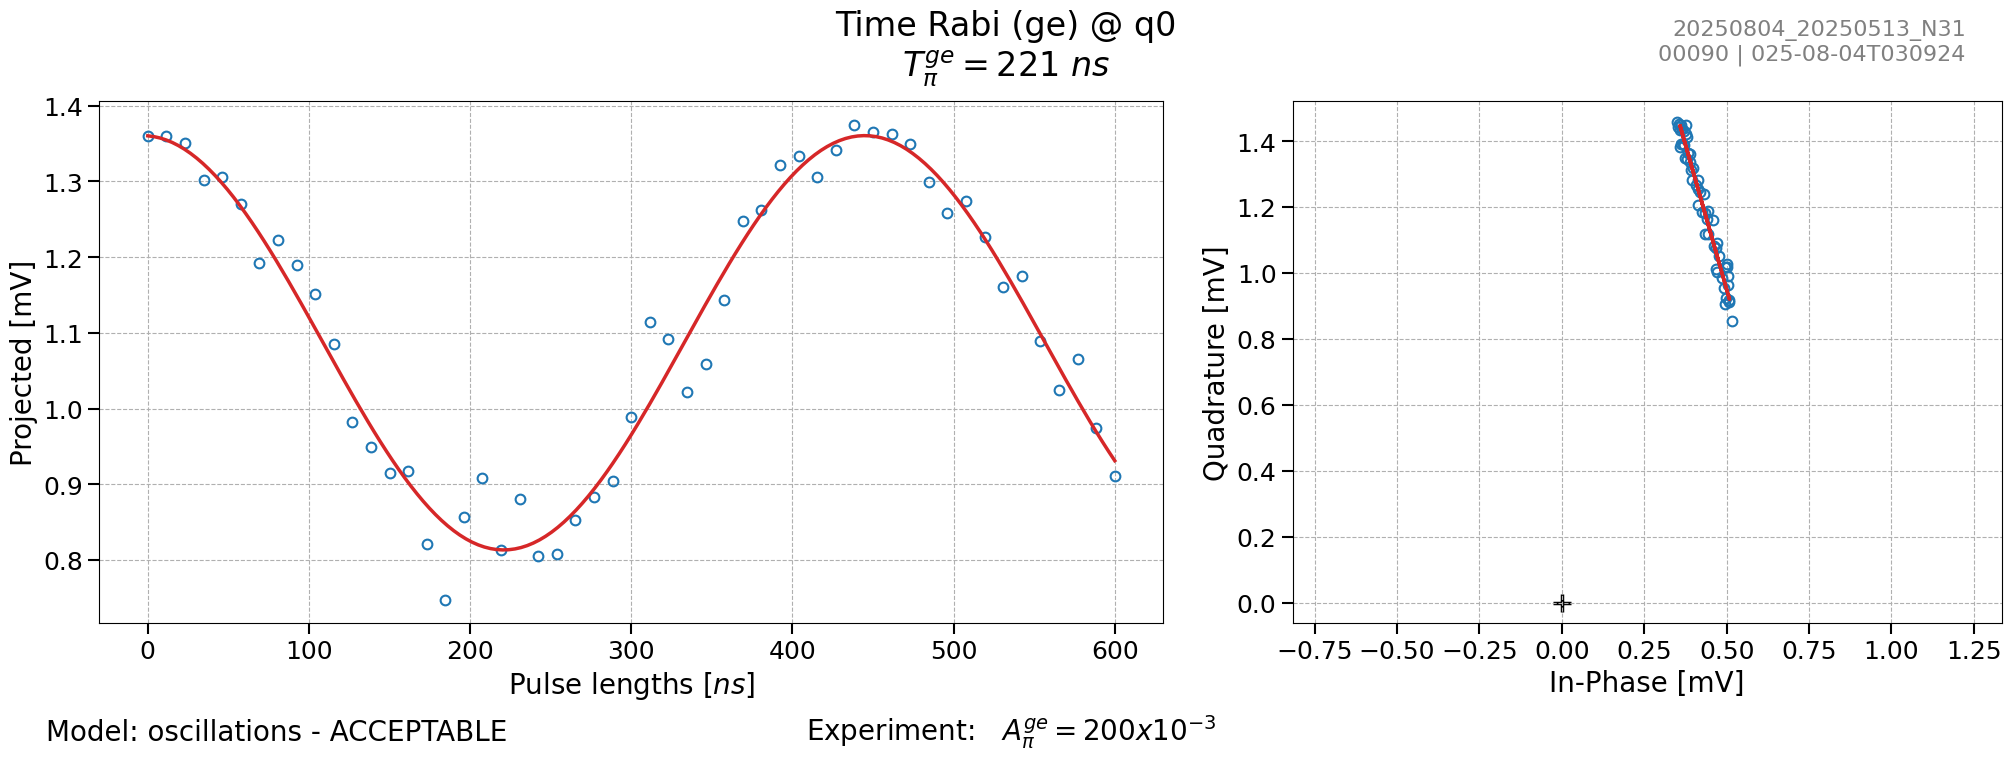

In [3]:
import numpy as np
from time_rabi import TimeRabi, TimeRabiOptions
from laboneq.dsl.enums import AcquisitionType, AveragingMode

time_rabi = TimeRabi()
options = TimeRabiOptions()
options.count = 2**7
options.acquisition_type = AcquisitionType.SPECTROSCOPY

result = time_rabi.run(
    [np.linspace(1e-10, 600e-9, 53)],
    # sweeps={"readout_range_out": [-30, -20], "readout_amplitude": [0.5, 1]},
    # sweeps={"resonance_frequency_ge": np.linspace(qu_freq-5e6, qu_freq+5e6, 11)},
    # transition="ef",
    options=options,
)

### T1

2025-08-04 03:15:45,562 - INFO - Successfully connected to zi


[2025.08.04 03:15:45.562] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.08.04 03:15:45.562] INFO    VERSION: laboneq 2.57.0
[2025.08.04 03:15:45.571] INFO    Connecting to data server at localhost:8004
[2025.08.04 03:15:45.575] INFO    Connected to Zurich Instruments LabOne Data Server version 25.07.0.507 at localhost:8004
[2025.08.04 03:15:45.579] INFO    Configuring the device setup
[2025.08.04 03:15:45.590] INFO    The device setup is configured


2025-08-04 03:15:45,590 - INFO - Setting up instruments
2025-08-04 03:15:45,601 - INFO - Before exp


[2025.08.04 03:15:45.606] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/acquire' to HARDWARE
[2025.08.04 03:15:45.606] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.08.04 03:15:45.606] INFO    Starting LabOne Q Compiler run...
[2025.08.04 03:15:45.618] INFO    Schedule completed. [0.005 s]
[2025.08.04 03:15:45.626] INFO    Code generation completed for all AWGs. [0.007 s]
[2025.08.04 03:15:45.626] INFO    Completed compilation step 1 of 1. [0.014 s]
[2025.08.04 03:15:45.626] INFO     ──────────────────────────────────────────────────────────────── 
[2025.08.04 03:15:45.626] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.08.04 03:15:45.626] INFO     ──────────────────────────────────────────────────────────────── 
[2025.08.04 03:15:45.636] INFO      shfqc_0        0         99            0           1      8000  
[2025.08.04 03:15:45.636] INFO      shfqc_0_

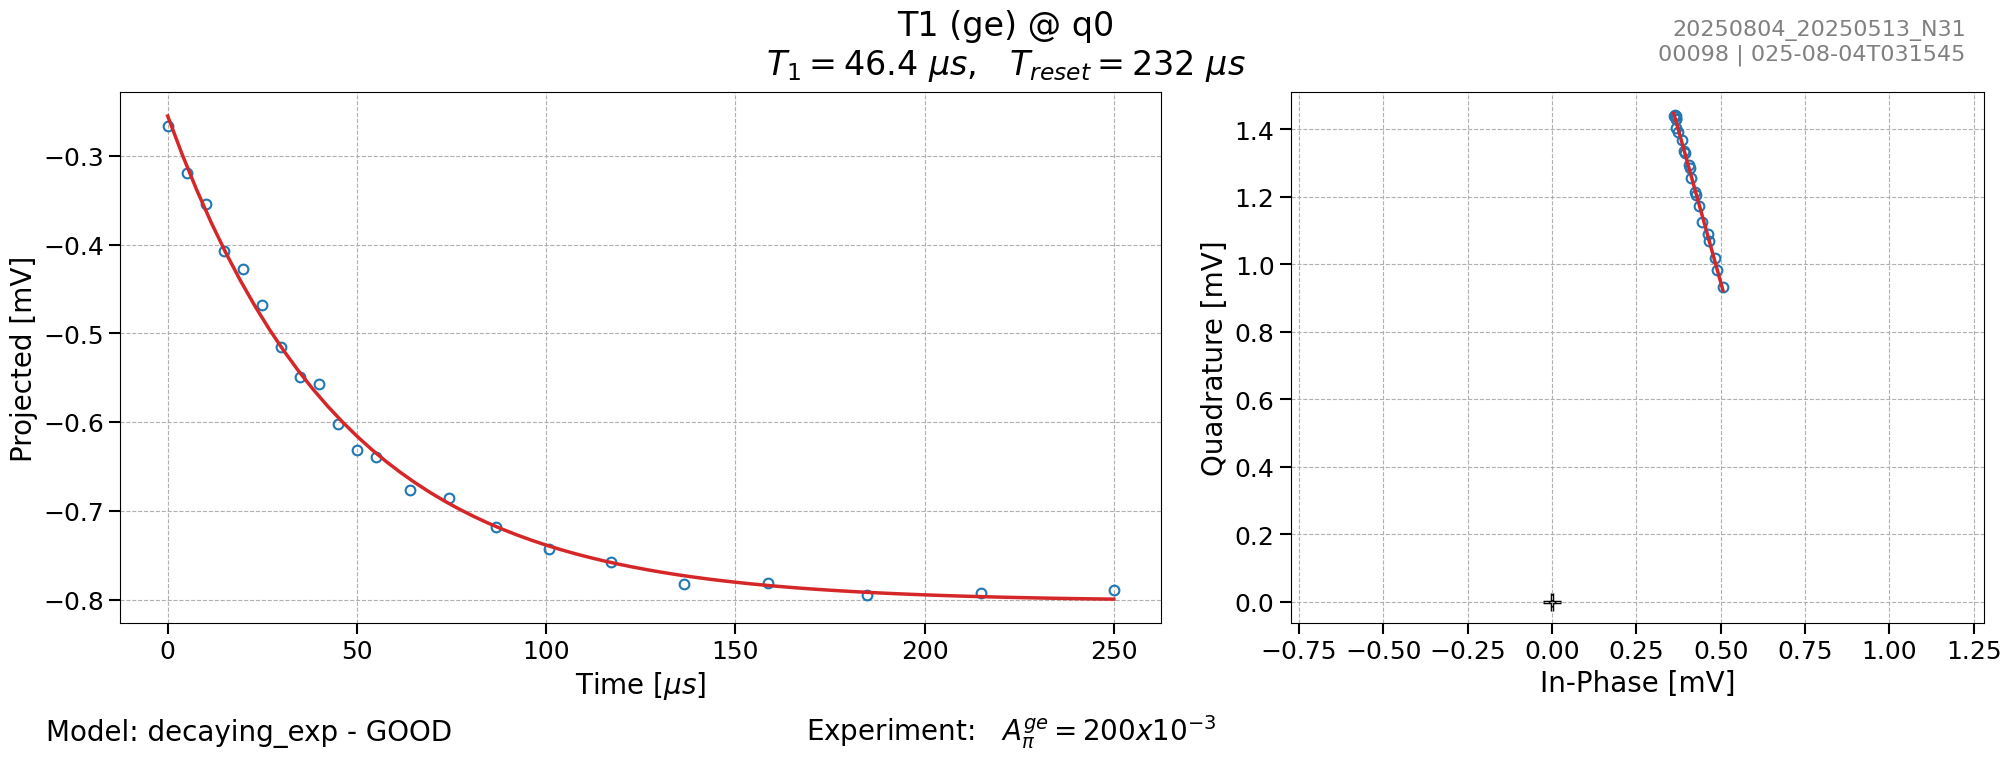

In [4]:
from sqil_experiments.measurements.T1 import T1
import numpy as np
from laboneq_applications.experiments.options import (
    TuneupExperimentOptions,
)
from laboneq.dsl.enums import AcquisitionType

T1_value = 50e-6

time = np.hstack(
    [
        np.linspace(0, T1_value, 11),
        np.logspace(np.log(T1_value * 1.1), np.log(5 * T1_value), 11, base=np.e),
    ]
)

options =TuneupExperimentOptions()
options.acquisition_type = AcquisitionType.SPECTROSCOPY
options.count = 2**11


T1_exp = T1()
result = T1_exp.run(
    [time],
    options=options,
)

### T2 echo

2025-08-04 03:14:55,205 - INFO - Successfully connected to zi


[2025.08.04 03:14:55.210] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.08.04 03:14:55.214] INFO    VERSION: laboneq 2.57.0
[2025.08.04 03:14:55.215] INFO    Connecting to data server at localhost:8004
[2025.08.04 03:14:55.218] INFO    Connected to Zurich Instruments LabOne Data Server version 25.07.0.507 at localhost:8004
[2025.08.04 03:14:55.221] INFO    Configuring the device setup
[2025.08.04 03:14:55.234] INFO    The device setup is configured


2025-08-04 03:14:55,243 - INFO - Setting up instruments
2025-08-04 03:14:55,243 - INFO - Before exp


[2025.08.04 03:14:55.248] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/acquire' to HARDWARE
[2025.08.04 03:14:55.248] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.08.04 03:14:55.248] INFO    Starting LabOne Q Compiler run...
[2025.08.04 03:14:55.359] INFO    Schedule completed. [0.100 s]
[2025.08.04 03:14:55.369] INFO    Code generation completed for all AWGs. [0.014 s]
[2025.08.04 03:14:55.369] INFO    Completed compilation step 1 of 1. [0.116 s]
[2025.08.04 03:14:55.377] INFO     ──────────────────────────────────────────────────────────────── 
[2025.08.04 03:14:55.377] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.08.04 03:14:55.377] INFO     ──────────────────────────────────────────────────────────────── 
[2025.08.04 03:14:55.380] INFO      shfqc_0        0         99            0           1      8000  
[2025.08.04 03:14:55.381] INFO      shfqc_0_

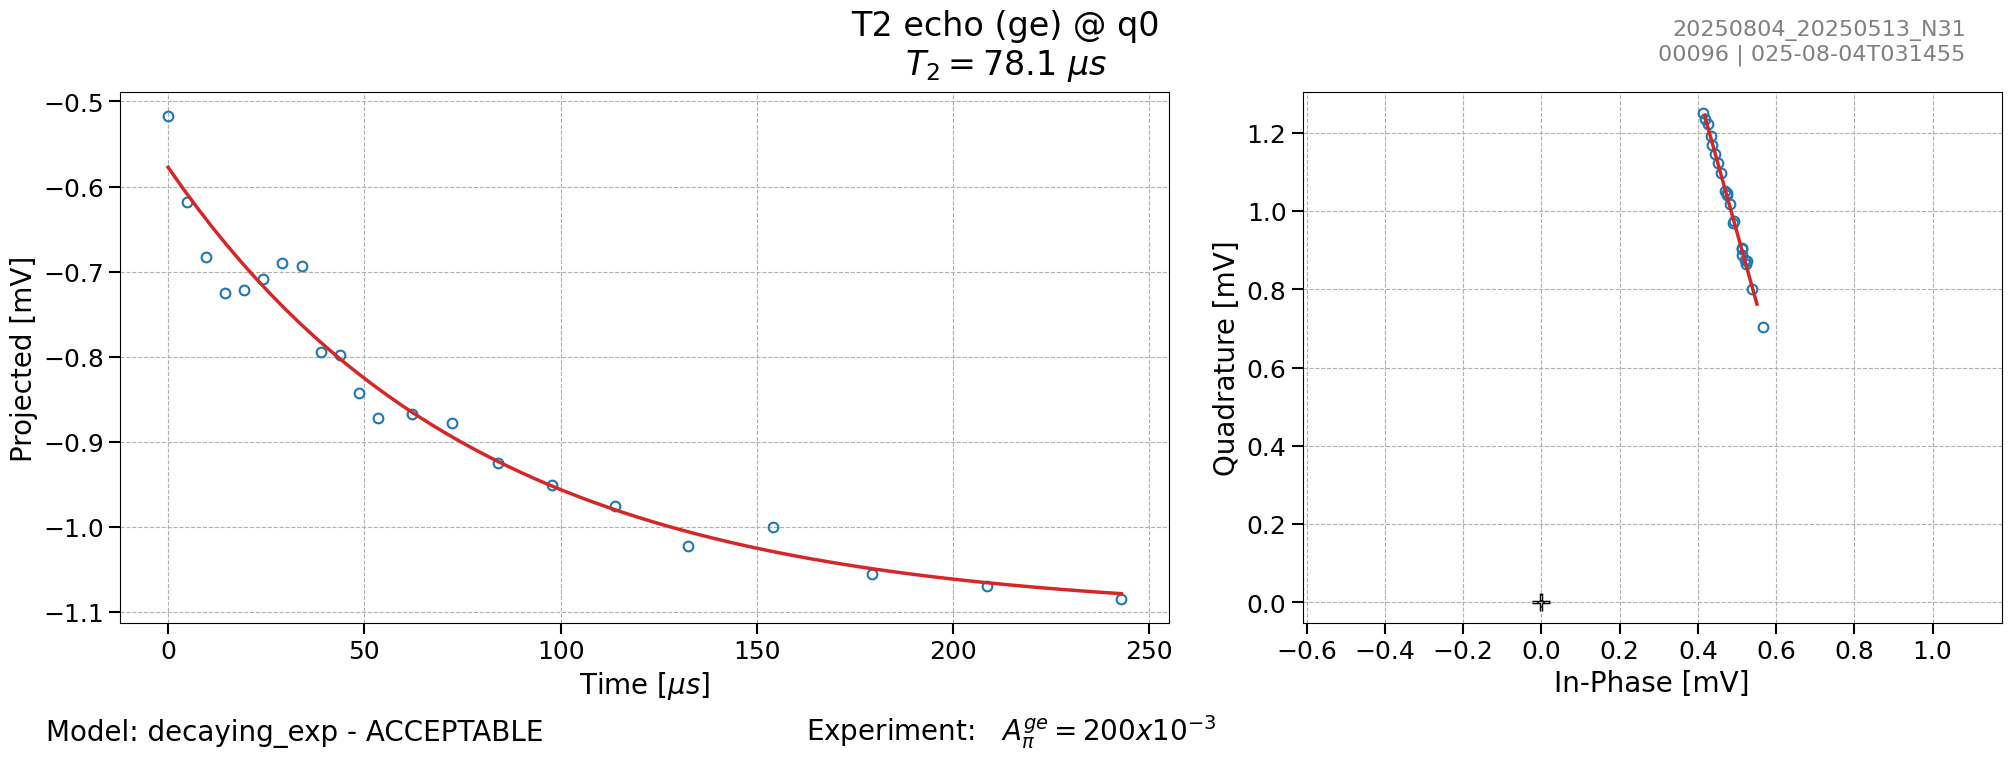

In [2]:
from sqil_experiments.measurements.T2_echo import T2Echo, EchoExperimentOptions
import numpy as np
from laboneq.dsl.enums import AcquisitionType

T2_exp = T2Echo()

T1 = T2_exp.qubit_value("ge_T1", "q0") or 100e-6
time = np.hstack(
    [
        np.linspace(0, T1, 11),
        np.logspace(np.log(T1 * 1.1), np.log(5 * T1), 11, base=np.e),
    ]
)

options = EchoExperimentOptions()
options.acquisition_type = AcquisitionType.SPECTROSCOPY
options.count = 2**11


result = T2_exp.run(
    [time],
    options=options,
)

### Ramsey

2025-08-04 03:15:12,228 - INFO - Successfully connected to zi


[2025.08.04 03:15:12.234] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.08.04 03:15:12.237] INFO    VERSION: laboneq 2.57.0
[2025.08.04 03:15:12.237] INFO    Connecting to data server at localhost:8004
[2025.08.04 03:15:12.241] INFO    Connected to Zurich Instruments LabOne Data Server version 25.07.0.507 at localhost:8004
[2025.08.04 03:15:12.248] INFO    Configuring the device setup
[2025.08.04 03:15:12.256] INFO    The device setup is configured


2025-08-04 03:15:12,271 - INFO - Setting up instruments
2025-08-04 03:15:12,271 - INFO - Before exp


[2025.08.04 03:15:12.284] INFO    Resolved modulation type of oscillator 'q0_readout_acquire_osc' on signal 'q0/acquire' to HARDWARE
[2025.08.04 03:15:12.285] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.08.04 03:15:12.286] INFO    Starting LabOne Q Compiler run...
[2025.08.04 03:15:12.311] INFO    Schedule completed. [0.024 s]
[2025.08.04 03:15:12.364] INFO    Code generation completed for all AWGs. [0.053 s]
[2025.08.04 03:15:12.364] INFO    Completed compilation step 1 of 1. [0.080 s]
[2025.08.04 03:15:12.368] INFO     ──────────────────────────────────────────────────────────────── 
[2025.08.04 03:15:12.368] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.08.04 03:15:12.368] INFO     ──────────────────────────────────────────────────────────────── 
[2025.08.04 03:15:12.368] INFO      shfqc_0        0        411            0           1      8000  
[2025.08.04 03:15:12.368] INFO      shfqc_0_

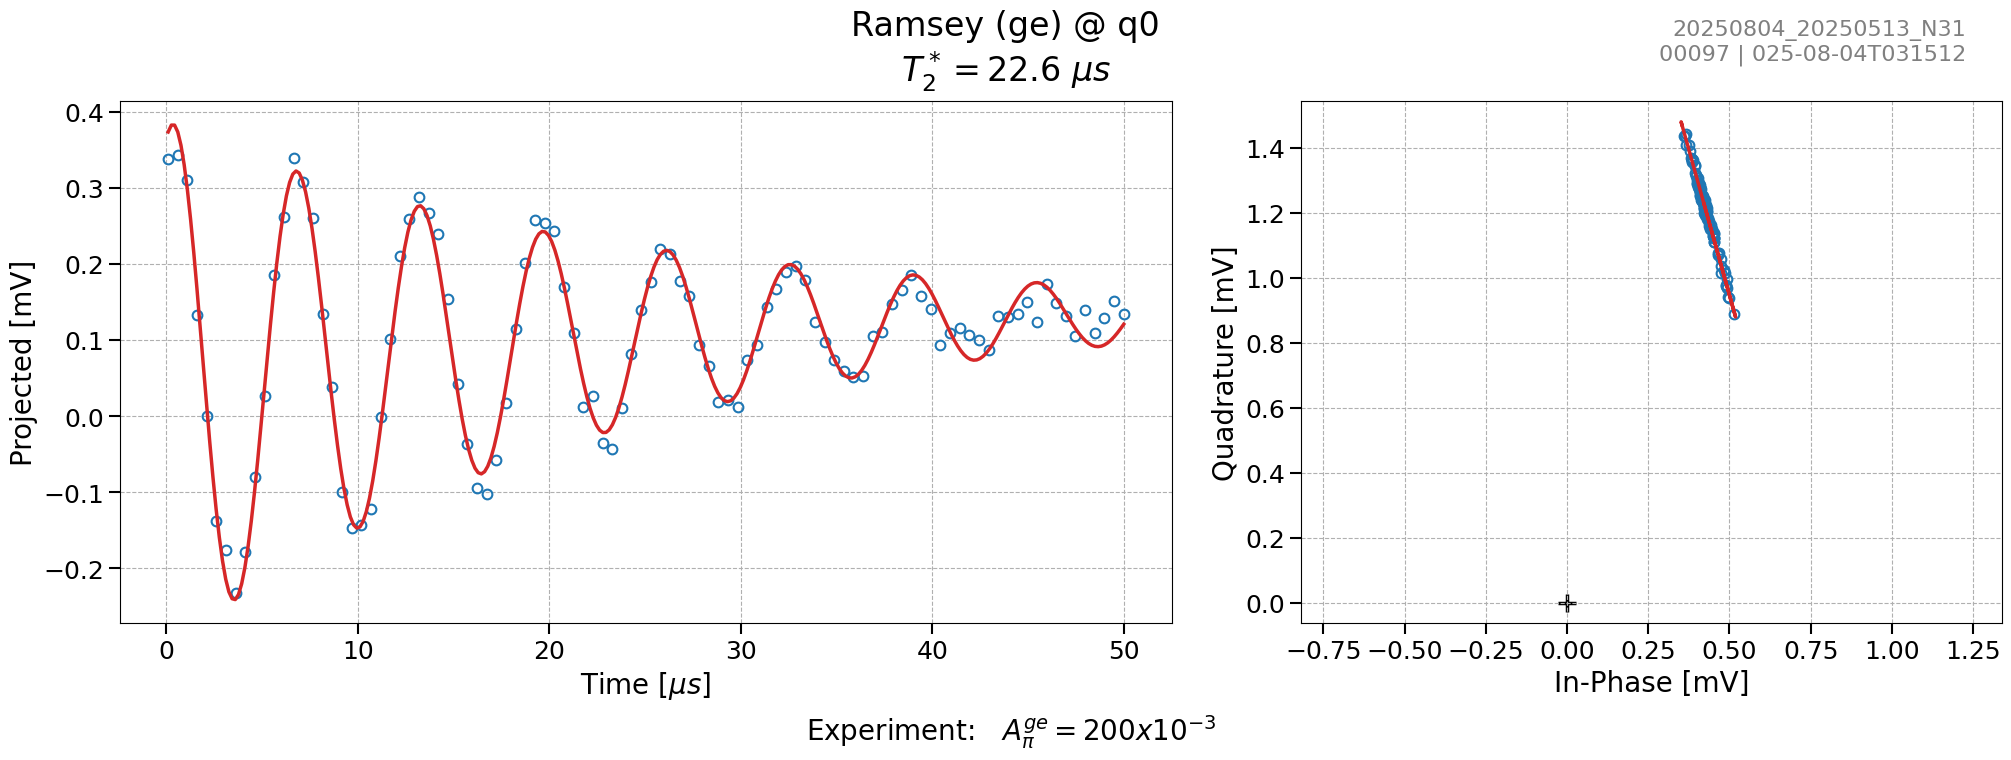

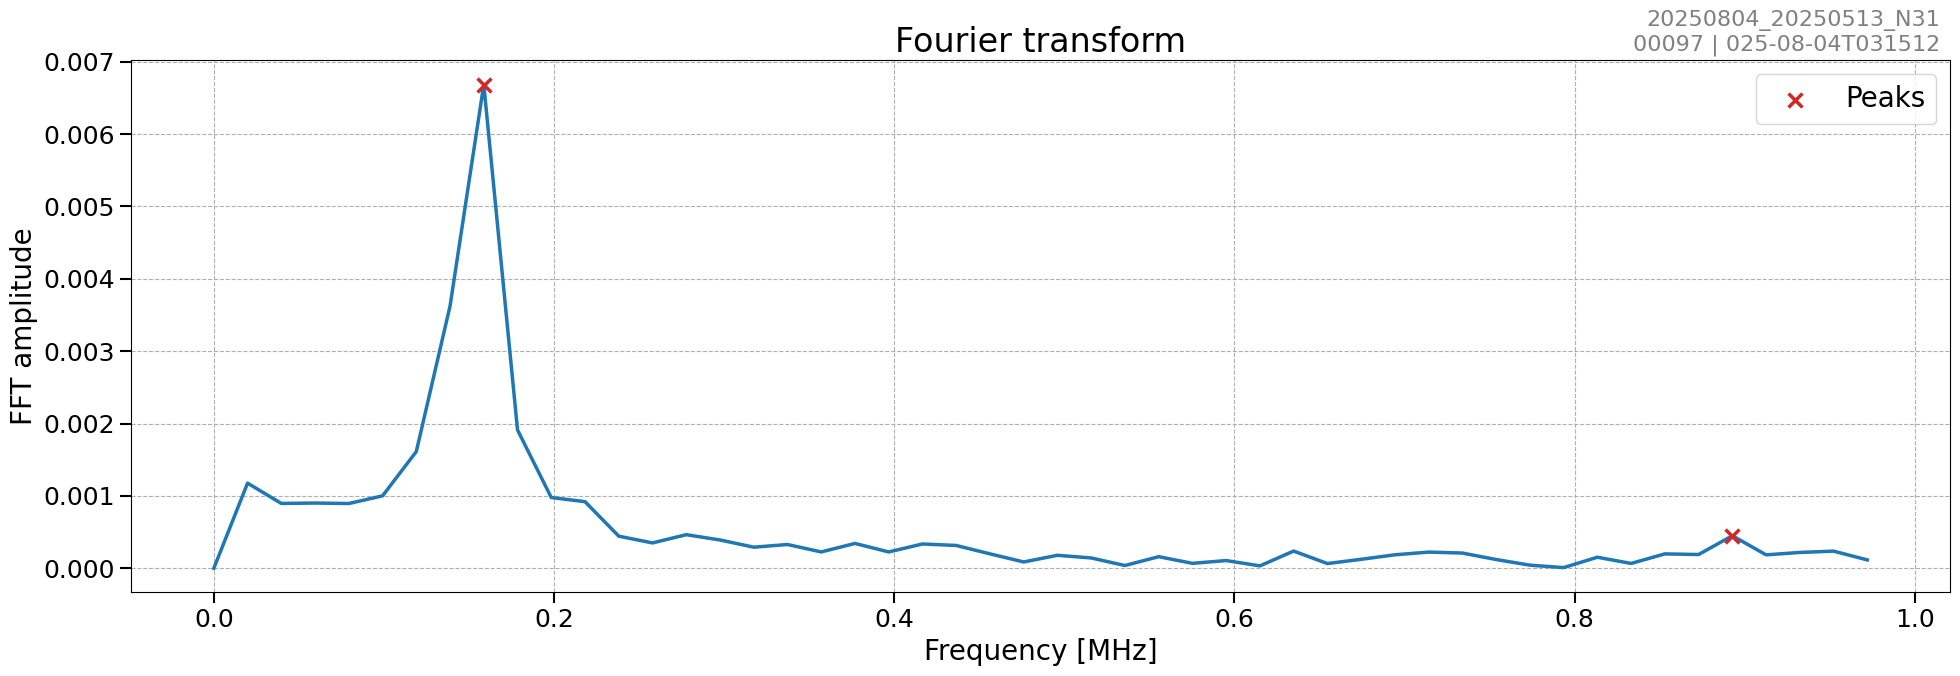

In [3]:
from sqil_experiments.measurements.ramsey import Ramsey
import numpy as np
from laboneq_applications.experiments.options import (
    TuneupExperimentOptions,
)
from laboneq.dsl.enums import AcquisitionType

time = np.linspace(0.1e-6, 50e-6, 100)
detuning = 0.2e6

options = TuneupExperimentOptions()
options.acquisition_type = AcquisitionType.SPECTROSCOPY
options.count = 2**10


ramsey_exp = Ramsey()
result = ramsey_exp.run(
    [time],
    [detuning],
    options=options,
)

### Tests

In [ ]:
import numpy as np
10 + 20 * np.log10(0.003)

np.float64(-10.0)

2025-08-03 20:28:20,792 - INFO - Successfully connected to zi


[2025.08.03 20:28:20.792] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\sqil_experiments\measurements\laboneq_output\log
[2025.08.03 20:28:20.792] INFO    VERSION: laboneq 2.57.0
[2025.08.03 20:28:20.801] INFO    Connecting to data server at localhost:8004
[2025.08.03 20:28:20.808] INFO    Connected to Zurich Instruments LabOne Data Server version 25.07.0.507 at localhost:8004
[2025.08.03 20:28:20.815] INFO    Configuring the device setup
[2025.08.03 20:28:20.823] INFO    The device setup is configured


2025-08-03 20:28:20,826 - INFO - Setting up instruments
2025-08-03 20:28:20,827 - INFO - Before exp


[2025.08.03 20:28:20.838] INFO    Resolved modulation type of oscillator 'q0_drive_ge_osc' on signal 'q0/drive' to HARDWARE
[2025.08.03 20:28:20.839] INFO    Resolved modulation type of oscillator 'q0_drive_ef_osc' on signal 'q0/drive_ef' to HARDWARE
[2025.08.03 20:28:20.841] INFO    Starting LabOne Q Compiler run...
[2025.08.03 20:28:20.868] INFO    Schedule completed. [0.025 s]
[2025.08.03 20:28:20.890] INFO    Code generation completed for all AWGs. [0.022 s]
[2025.08.03 20:28:20.890] INFO    Completed compilation step 1 of 1. [0.049 s]
[2025.08.03 20:28:20.890] INFO     ──────────────────────────────────────────────────────────────── 
[2025.08.03 20:28:20.890] INFO      Device       AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.08.03 20:28:20.890] INFO     ──────────────────────────────────────────────────────────────── 
[2025.08.03 20:28:20.890] INFO      shfqc_0        0         21            0           1      8000  
[2025.08.03 20:28:20.900] INFO      shfqc_0_sg    

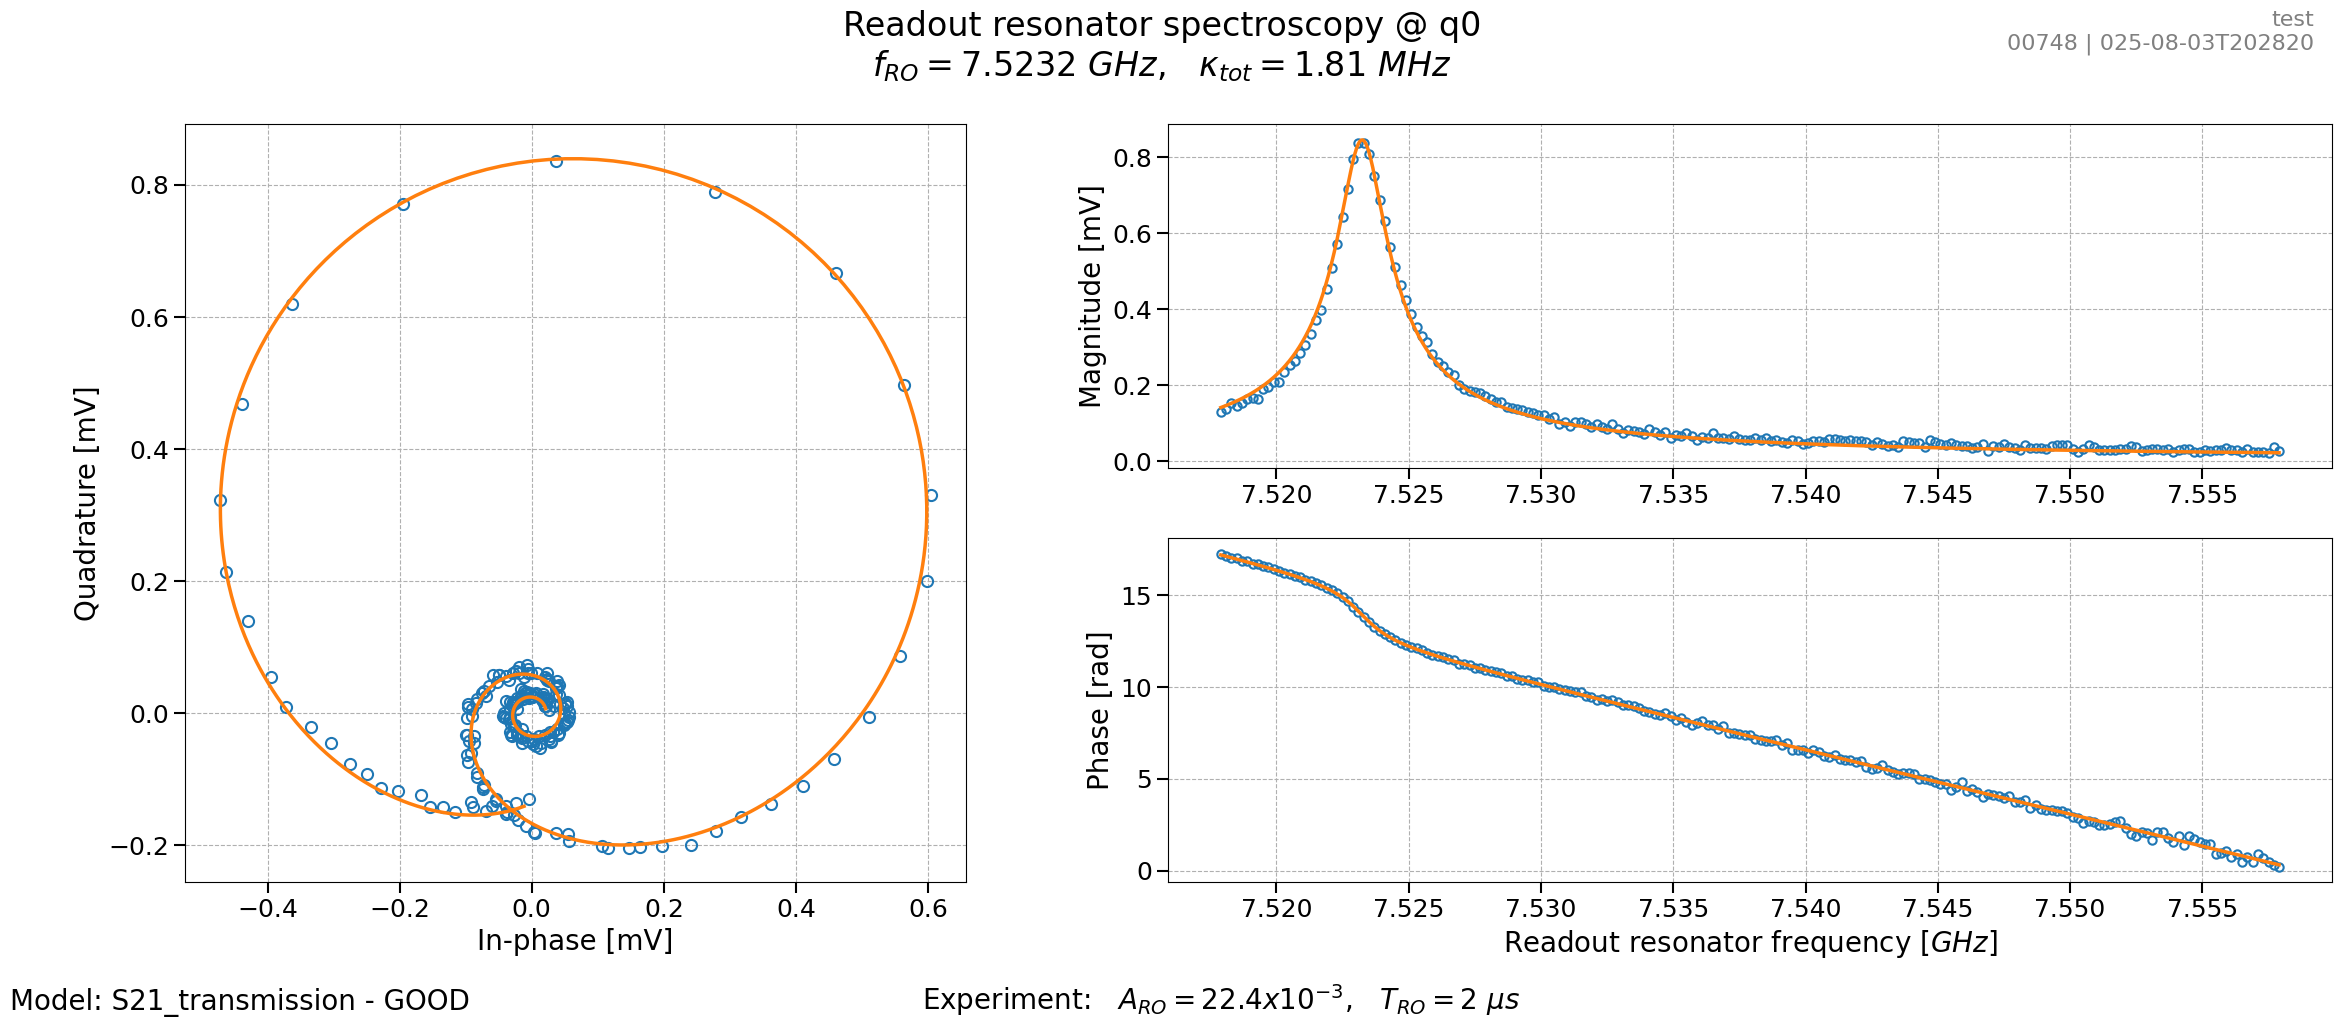

In [1]:
import numpy as np
from rr_spec import RRSpec, ResonatorSpectroscopyExperimentOptions

ro_freq = 7.5379e9

rr_spec = RRSpec()
options = ResonatorSpectroscopyExperimentOptions()
options.count = 400

result = rr_spec.run(
    np.linspace(ro_freq + 20e6, ro_freq - 20e6, 201),
    # sweeps={"readout_amplitude": np.linspace(0.003, 0.03, 3)},
    # sweeps={"current": np.linspace(1e-4, 2e-4, 3)},
    options=options,
)

average relative std: 0.45369850227250913
average std: 9.460869266857227e-05
std of the std: 1.3977359178516824e-05
relative std over std avg: 0.14773863568204568


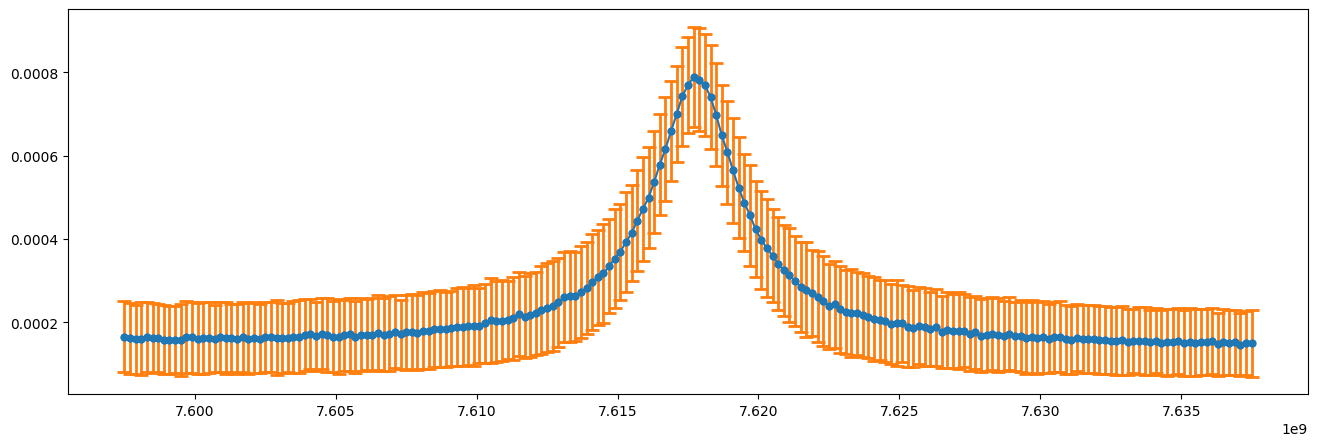

In [ ]:
import sqil_core as sqil
import matplotlib.pyplot as plt

# count = 2600
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00163-rr_spectroscopy_2025-05-14T012721"
# count = 1048
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00158-rr_spectroscopy_2025-05-14T012004"
# count = 200
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00165-rr_spectroscopy_2025-05-14T014453"
# count = 100
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00164-rr_spectroscopy_2025-05-14T012812"
# count = 2
# path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-14\00159-rr_spectroscopy_2025-05-14T012109"

data, freq, sweep = sqil.extract_h5_data(
    path, ["data", "frequencies", "sweep0"]
)
linmag = np.abs(data[0])
print(
    "average relative std:", np.mean(np.std(linmag, axis=0) / np.mean(linmag, axis=0))
)
print("average std:", np.mean(np.std(linmag, axis=0)))
print("std of the std:", np.std(np.std(linmag, axis=0)))
print(
    "relative std over std avg:",
    np.mean(np.std(np.std(linmag, axis=0)) / np.mean(np.std(linmag, axis=0))),
)

plt.figure(figsize=(16, 5))
plt.errorbar(
    freq[0],
    np.mean(linmag, axis=0),
    np.std(linmag, axis=0),
    fmt="-o",
    color="tab:blue",
    label="Mean with Error",
    ecolor="tab:orange",
    capsize=5,
    capthick=2,
    elinewidth=2,
    markersize=5,
)
plt.show()

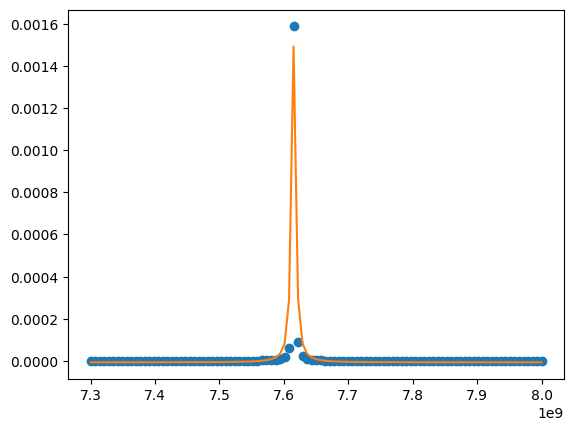

In [ ]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\2025-05-12\00011-rr spectroscopy_2025-05-12T231453"

data, freq = sqil.extract_h5_data(path, ["data", "frequencies"])

fit_res = sqil.fit.fit_lorentzian(freq, np.abs(data)**2)

plt.plot(freq, np.abs(data)**2, 'o')
plt.plot(freq, fit_res.predict(freq))
plt.show()

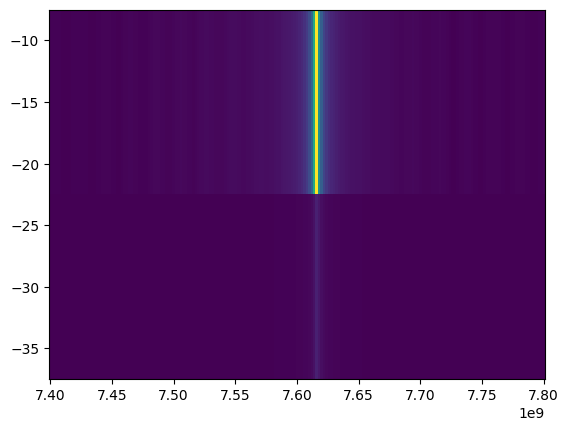

In [ ]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\2025-05-13\00029-rr spectroscopy_2025-05-13T005313"

data, freq, sweep = sqil.extract_h5_data(path, ["data", "frequencies", "sweep0"])

# for d, f, s in zip(data, freq, sweep):
#     plt.plot(f, np.abs(d), label=s)
# plt.legend()

plt.pcolormesh(freq[0], sweep, np.abs(data))

(201,) (2,) (2, 201)


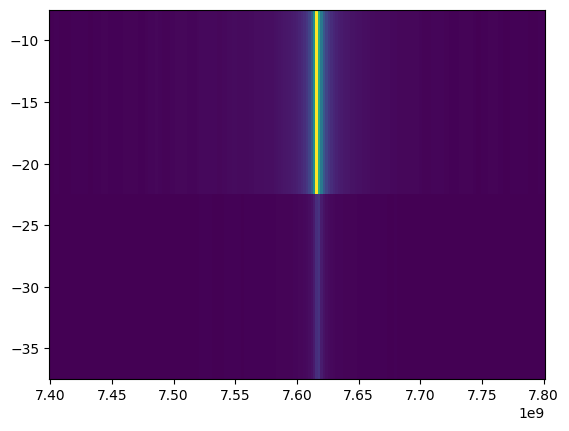

In [ ]:
path = r"Z:\Projects\BottomLoader\data\20250430_Transmon_20250207_multi_Fl_NbAl_N45\2025-05-13\00429-pulsed_onetone_vs_ro_power_2025-05-13T003736"

data, freq, sweep = sqil.extract_h5_data(path, ["data", "ro_freq", "sweep_param"])
plt.pcolormesh(freq[0], sweep, np.abs(data))

print(freq[0].shape, sweep.shape, data.shape)

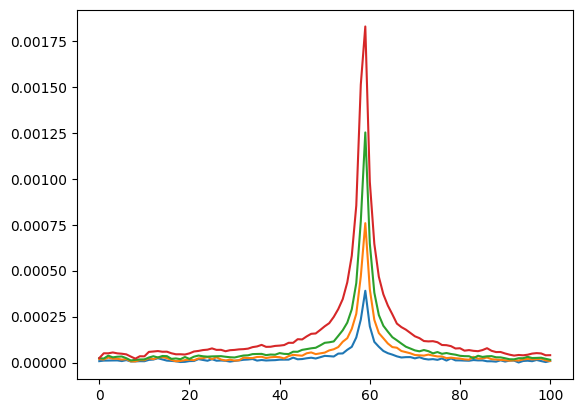

In [ ]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\data_local\2025-05-13\00126-rr spectroscopy_2025-05-13T222549"

data, freq, sweep0, sweep1 = sqil.extract_h5_data(path, ["data", "frequencies", "sweep0", "sweep1"])

data.shape, freq.shape, sweep0.shape, sweep1.shape

plt.plot(np.abs(data).T)